In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

2025-11-28 05:23:09.689576: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])


In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6702 - loss: 1.0222 - val_accuracy: 0.8256 - val_loss: 0.5129
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8233 - loss: 0.5122 - val_accuracy: 0.8404 - val_loss: 0.4547
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8406 - loss: 0.4566 - val_accuracy: 0.8476 - val_loss: 0.4281
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8509 - loss: 0.4255 - val_accuracy: 0.8516 - val_loss: 0.4118
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8595 - loss: 0.4031 - val_accuracy: 0.8560 - val_loss: 0.3995
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8650 - loss: 0.3855 - val_accuracy: 0.8596 - val_loss: 0.3906
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8685 - loss: 0.3709 - val_accuracy: 0.8604 - val_loss: 0.3826
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8729 - loss: 0.3585 -

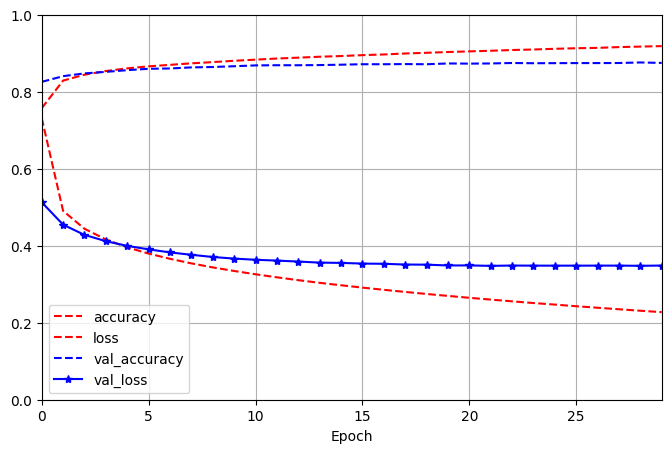

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize = (8,5), xlim = [0,29], ylim = [0,1], grid = True, xlabel = "Epoch", style = ["r--", "r--", "b--", "b-*"]
)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8738 - loss: 0.3634


[0.3635416328907013, 0.8730999827384949]

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.02, 0.  , 0.72],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [4]:
from pathlib import Path
from time import strftime
def get_run_logdir(root_logdir = "my_dir"):
    return Path(root_logdir)/strftime("run_%Y_%m_%D_%H_%M_%S")

run_logdir = get_run_logdir()

In [8]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,profile_batch = (100, 200))
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = 30, callbacks = [tensorboard_cb], validation_data = (X_valid, y_valid))

2025-11-28 05:39:45.803354: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-11-28 05:39:45.803395: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-11-28 05:39:45.830925: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
I0000 00:00:1764308385.831082    2029 cupti_tracer.cc:1381] CUPTI activity buffer flushed


Epoch 1/30


2025-11-28 05:39:47.216908: I external/local_xla/xla/service/service.cc:163] XLA service 0x753cfc003f70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-28 05:39:47.216945: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-11-28 05:39:47.247303: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-28 05:39:47.336628: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90300
2025-11-28 05:39:47.364331: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-28 05:39:47.

  13/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1052 - loss: 2.2943    

I0000 00:00:1764308392.300499    3160 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 125/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4190 - loss: 1.8896

2025-11-28 05:39:52.896405: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-11-28 05:39:52.896453: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.


 224/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5018 - loss: 1.6914

2025-11-28 05:39:53.442133: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
I0000 00:00:1764308393.449579    2029 cupti_tracer.cc:1381] CUPTI activity buffer flushed
I0000 00:00:1764308393.473599    2029 cupti_collector.cc:841]  GpuTracer has collected 3396 callback api events and 3086 activity events. 
I0000 00:00:1764308393.473749    2029 cupti_collector.cc:844]  GpuTracer max callback_events: 2097152, max activity events: 2097152
2025-11-28 05:39:53.488798: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:136] Profiler session tear down.
2025-11-28 05:39:53.499413: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:150] Collecting XSpace to repository: my_dir/run_2025_11_11/28/25_05_32_58/train/plugins/profile/2025_11_28_05_39_53/LAPTOP-AA54S6C9.xplane.pb


1487/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6903 - loss: 1.0324

2025-11-28 05:39:58.957710: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-28 05:39:58.957908: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-28 05:40:00.244513: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_177', 20 bytes spill stores, 20 bytes spill loads

2025-11-28 05:40:00.754266: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : 

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7009 - loss: 0.9910 - val_accuracy: 0.8200 - val_loss: 0.5217
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8295 - loss: 0.4963 - val_accuracy: 0.8412 - val_loss: 0.4418
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8448 - loss: 0.4442 - val_accuracy: 0.8484 - val_loss: 0.4255
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8538 - loss: 0.4181 - val_accuracy: 0.8466 - val_loss: 0.4252
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8648 - loss: 0.3902 - val_accuracy: 0.8562 - val_loss: 0.3955
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8666 - loss: 0.3790 - val_accuracy: 0.8578 - val_loss: 0.3922
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8707 - loss: 0.3624 - val_accuracy: 0.8676 - val_loss: 0.3660
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8777 - loss: 0.3484 - val_accura

In [12]:
%load_ext tensorboard
%tensorboard --logdir=./my_dir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 11123), started 0:01:07 ago. (Use '!kill 11123' to kill it.)

UsageError: Line magic function `%exit_ext` not found.
